# Data science challenge

## Load library and data

In [37]:
# load dependencies
import numpy as np
import pandas as pd
import sklearn
from zipfile import ZipFile
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import seaborn as sns
%matplotlib inline
from ipywidgets import interactive, IntSlider
from sklearn import tree
backup = pd.HDFStore('backup.h5')

In [38]:
# loading the data
zipfile = ZipFile('census_data.zip')
df = pd.read_csv(zipfile.open("census_data.csv"))

## Exploration

In [39]:
# exploration
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)
df.head()

,age,class_of_worker,education,wage_per_hour,marital_status,major_industry_code,major_occupation_code,race,sex,full_or_part_time_employment_stat,capital_gains,capital_losses,divdends_from_stocks,live_in_this_house_1_year_ago,family_members_under,total_person_earnings,country_of_birth_father,country_of_birth_mother,country_of_birth_self,citizenship,own_business_or_self_employed,weeks_worked,earn_over_50k
0,73,Not in universe,High school graduate,0,Widowed,Not in universe or children,Not in universe,White,Female,Not in labor force,0,0,0,Not in universe under 1 year old,0,Not in universe,United-States,United-States,United-States,Native- Born in the United States,Not in universe,0,-50000
1,58,Self-employed-not incorporated,Some college but no degree,0,Divorced,Construction,Precision production craft & repair,White,Male,Children or Armed Forces,0,0,0,No,1,Not in universe,United-States,United-States,United-States,Native- Born in the United States,Not in universe,52,-50000
2,18,Not in universe,10th grade,0,Never married,Not in universe or children,Not in universe,Asian or Pacific Islander,Female,Not in labor force,0,0,0,Not in universe under 1 year old,0,Not in universe,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,Not in universe,0,-50000
3,9,Not in universe,Children,0,Never married,Not in universe or children,Not in universe,White,Female,Children or Armed Forces,0,0,0,Yes,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,Not in universe,0,-50000
4,10,Not in universe,Children,0,Never married,Not in universe or children,Not in universe,White,Female,Children or Armed Forces,0,0,0,Yes,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,Not in universe,0,-50000


In [40]:
df.shape  # almost 200k row, and 23 columns

(199523, 23)

In [41]:
df.describe()

,age,wage_per_hour,capital_gains,capital_losses,divdends_from_stocks,family_members_under,weeks_worked
count,199523.000000,199523.000000,199523.00000,199523.000000,199523.000000,199523.000000,199523.000000
mean,34.494199,55.426908,434.71899,37.313788,197.529533,1.956180,23.174897
std,22.310895,274.896454,4697.53128,271.896428,1984.163658,2.365126,24.411488
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,15.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,33.000000,0.000000,0.00000,0.000000,0.000000,1.000000,8.000000
75%,50.000000,0.000000,0.00000,0.000000,0.000000,4.000000,52.000000
max,90.000000,9999.000000,99999.00000,4608.000000,99999.000000,6.000000,52.000000


In [42]:
len(df.columns)  # 23 different columns

23

In [43]:
df["earn_over_50k"].unique()  # only two types

array(['-50000', '50000+.'], dtype=object)

In [44]:
df.isnull().sum()  # no missing values seemingly

age                                  0
class_of_worker                      0
education                            0
wage_per_hour                        0
marital_status                       0
major_industry_code                  0
major_occupation_code                0
race                                 0
sex                                  0
full_or_part_time_employment_stat    0
capital_gains                        0
capital_losses                       0
divdends_from_stocks                 0
live_in_this_house_1_year_ago        0
family_members_under                 0
total_person_earnings                0
country_of_birth_father              0
country_of_birth_mother              0
country_of_birth_self                0
citizenship                          0
own_business_or_self_employed        0
weeks_worked                         0
earn_over_50k                        0
dtype: int64

In [45]:
df["weeks_worked"].unique()

array([ 0, 52, 30, 49, 32, 15, 38, 48,  9, 24, 50, 10, 45, 43,  4, 26, 40,
       20,  6, 12, 51,  1,  8, 39, 13, 16, 34, 14, 36, 44, 22, 41, 46, 28,
       23, 35, 25, 17, 11, 37,  5, 42, 29,  2, 21, 19, 47,  3, 27,  7, 18,
       33, 31])

In [46]:
df.dtypes

age                                   int64
class_of_worker                      object
education                            object
wage_per_hour                         int64
marital_status                       object
major_industry_code                  object
major_occupation_code                object
race                                 object
sex                                  object
full_or_part_time_employment_stat    object
capital_gains                         int64
capital_losses                        int64
divdends_from_stocks                  int64
live_in_this_house_1_year_ago        object
family_members_under                  int64
total_person_earnings                object
country_of_birth_father              object
country_of_birth_mother              object
country_of_birth_self                object
citizenship                          object
own_business_or_self_employed        object
weeks_worked                          int64
earn_over_50k                   

In [47]:
# function to return the list of columns of the type
def get_cols_of_type(input_df, data_type):
    '''
    Takes a dataframe and dtype, eg. string, and returns a list of columns names of that dtype.
    '''
    output_list = []
    dtype_dict = input_df.dtypes.to_dict()
    for key in dtype_dict.keys():
        if dtype_dict[key] == data_type:
            output_list.append(key)
    return output_list
get_cols_of_type(df, "object")

['class_of_worker',
 'education',
 'marital_status',
 'major_industry_code',
 'major_occupation_code',
 'race',
 'sex',
 'full_or_part_time_employment_stat',
 'live_in_this_house_1_year_ago',
 'total_person_earnings',
 'country_of_birth_father',
 'country_of_birth_mother',
 'country_of_birth_self',
 'citizenship',
 'own_business_or_self_employed',
 'earn_over_50k']

In [48]:
# display int datatypes from our dataframe
get_cols_of_type(df, int)

['age',
 'wage_per_hour',
 'capital_gains',
 'capital_losses',
 'divdends_from_stocks',
 'family_members_under',
 'weeks_worked']

In [49]:
# display object datatypes from our dataframe
get_cols_of_type(df, object)  # earn over 50k is still object

['class_of_worker',
 'education',
 'marital_status',
 'major_industry_code',
 'major_occupation_code',
 'race',
 'sex',
 'full_or_part_time_employment_stat',
 'live_in_this_house_1_year_ago',
 'total_person_earnings',
 'country_of_birth_father',
 'country_of_birth_mother',
 'country_of_birth_self',
 'citizenship',
 'own_business_or_self_employed',
 'earn_over_50k']

In [50]:
# different column data types
nominal_cols = ["marital_status", "major_industry_code", "major_occupation_code", "race", "sex", "full_or_part_time_employment_stat", "live_in_this_house_1_year_ago",
               "country_of_birth_father", "country_of_birth_mother", "country_of_birth_self", "total_person_earnings", "citizenship", "own_business_or_self_employed",
               "class_of_worker"]

ordinal_cols = ["education"]

interval_cols = []

ratio_cols = ["age", "wage_per_hour", "capital_gains", "divdends_from_stocks", "family_members_under", "capital_losses", "weeks_worked" ]

target_col = ["earn_over_50k"]

In [51]:
# make sure I don't miss any columns
assert len(nominal_cols+ordinal_cols+interval_cols+ratio_cols+target_col) == len(df.columns)

In [52]:
# get the unique value in nominal columns
for feature in nominal_cols:
    print(feature+":")
    print(sorted(df[feature].unique()))
    print("")

marital_status:
['Divorced', 'Married-A F spouse present', 'Married-civilian spouse present', 'Married-spouse absent', 'Never married', 'Separated', 'Widowed']

major_industry_code:
['Agriculture', 'Armed Forces', 'Business and repair services', 'Communications', 'Construction', 'Education', 'Entertainment', 'Finance insurance and real estate', 'Forestry and fisheries', 'Hospital services', 'Manufacturing-durable goods', 'Manufacturing-nondurable goods', 'Medical except hospital', 'Mining', 'Not in universe or children', 'Other professional services', 'Personal services except private HH', 'Private household services', 'Public administration', 'Retail trade', 'Social services', 'Transportation', 'Utilities and sanitary services', 'Wholesale trade']

major_occupation_code:
['Adm support including clerical', 'Armed Forces', 'Executive admin and managerial', 'Farming forestry and fishing', 'Handlers equip cleaners etc', 'Machine operators assmblrs & inspctrs', 'Not in universe', 'Other se

In [53]:
print(df.country_of_birth_self.value_counts())  # ? is missing value

United-States                   176989
Mexico                            5767
?                                 3393
Puerto-Rico                       1400
Germany                            851
Philippines                        845
Cuba                               837
Canada                             700
Dominican-Republic                 690
El-Salvador                        689
China                              478
South Korea                        471
England                            457
Columbia                           434
Italy                              419
India                              408
Vietnam                            391
Poland                             381
Guatemala                          344
Japan                              339
Jamaica                            320
Peru                               268
Ecuador                            258
Haiti                              228
Nicaragua                          218
Taiwan                   

## Data cleaning

In [54]:
df["country_of_birth_father"].mode()

0    United-States
dtype: object

In [55]:
# replace ?
for feature in ["country_of_birth_father", "country_of_birth_mother", "country_of_birth_self"]:
    ### fill in the following line with some logic to replace "?" by the modal country of birth
    mode_series = df[feature].mode()
    df[feature] = df[feature].replace(["?"], [mode_series])

In [56]:
# check if ? still there
for feature in nominal_cols:
    print(feature+":")
    print(sorted(df[feature].unique()))
    print("")

marital_status:
['Divorced', 'Married-A F spouse present', 'Married-civilian spouse present', 'Married-spouse absent', 'Never married', 'Separated', 'Widowed']

major_industry_code:
['Agriculture', 'Armed Forces', 'Business and repair services', 'Communications', 'Construction', 'Education', 'Entertainment', 'Finance insurance and real estate', 'Forestry and fisheries', 'Hospital services', 'Manufacturing-durable goods', 'Manufacturing-nondurable goods', 'Medical except hospital', 'Mining', 'Not in universe or children', 'Other professional services', 'Personal services except private HH', 'Private household services', 'Public administration', 'Retail trade', 'Social services', 'Transportation', 'Utilities and sanitary services', 'Wholesale trade']

major_occupation_code:
['Adm support including clerical', 'Armed Forces', 'Executive admin and managerial', 'Farming forestry and fishing', 'Handlers equip cleaners etc', 'Machine operators assmblrs & inspctrs', 'Not in universe', 'Other se

In [57]:
# remove not in universe
df = df.replace("Not in universe", "null").replace("Not in universe or children", "null")\
                                          .replace("Not in universe under 1 year old", "null")

In [58]:
# check if not in universe still there
for feature in nominal_cols:
    print(feature+":")
    print(sorted(df[feature].unique()))
    print("")

marital_status:
['Divorced', 'Married-A F spouse present', 'Married-civilian spouse present', 'Married-spouse absent', 'Never married', 'Separated', 'Widowed']

major_industry_code:
['Agriculture', 'Armed Forces', 'Business and repair services', 'Communications', 'Construction', 'Education', 'Entertainment', 'Finance insurance and real estate', 'Forestry and fisheries', 'Hospital services', 'Manufacturing-durable goods', 'Manufacturing-nondurable goods', 'Medical except hospital', 'Mining', 'Other professional services', 'Personal services except private HH', 'Private household services', 'Public administration', 'Retail trade', 'Social services', 'Transportation', 'Utilities and sanitary services', 'Wholesale trade', 'null']

major_occupation_code:
['Adm support including clerical', 'Armed Forces', 'Executive admin and managerial', 'Farming forestry and fishing', 'Handlers equip cleaners etc', 'Machine operators assmblrs & inspctrs', 'Other service', 'Precision production craft & repa

## Feature Engineering

### Turn some column into binary data

In [59]:
df["own_business_or_self_employed"].value_counts()

null    197539
No        1593
Yes        391
Name: own_business_or_self_employed, dtype: int64

In [60]:
# binarize
col_bin = ["sex", "live_in_this_house_1_year_ago", "country_of_birth_father",
            "country_of_birth_mother", "country_of_birth_self", "own_business_or_self_employed"]
bin_cols=["is_male", "has_lived_in_this_house_1_year_ago", "born_usa_father",
                      "born_usa_mother", "born_usa_self", "is_self_employed"]

In [61]:
# binarize the categories
df["is_male"] = np.where(df["sex"]=='Male', 1, 0)
df["has_lived_in_this_house_1_year_ago"] = np.where(df["live_in_this_house_1_year_ago"]=='Yes', 1, 0)
df["born_usa_father"] = np.where(df["country_of_birth_father"]=='United-States',1,0)
df["born_usa_mother"] = np.where(df["country_of_birth_mother"]=='United-States',1,0)
df["born_usa_self"] = np.where(df["country_of_birth_self"]=='United-States',1,0)
df["is_self_employed"] = np.where(df["own_business_or_self_employed"]=="Yes",1,0)

### Drop off unused column

In [62]:
col_bin = ["sex", "live_in_this_house_1_year_ago", "country_of_birth_father",
            "country_of_birth_mother", "country_of_birth_self", "own_business_or_self_employed"]
df = df.drop(columns=col_bin)
df.columns

Index(['age', 'class_of_worker', 'education', 'wage_per_hour', 'marital_status', 'major_industry_code', 'major_occupation_code', 'race', 'full_or_part_time_employment_stat', 'capital_gains', 'capital_losses', 'divdends_from_stocks', 'family_members_under', 'total_person_earnings', 'citizenship', 'weeks_worked', 'earn_over_50k', 'is_male', 'has_lived_in_this_house_1_year_ago', 'born_usa_father', 'born_usa_mother', 'born_usa_self', 'is_self_employed'], dtype='object')

### Dealing with other nominal columns

In [63]:
remaining_nominal_cols = list(set(nominal_cols)-set(col_bin))
remaining_nominal_cols
# we'll use one-hot encoding later for it

['class_of_worker',
 'major_industry_code',
 'total_person_earnings',
 'race',
 'major_occupation_code',
 'citizenship',
 'full_or_part_time_employment_stat',
 'marital_status']

### Dealing with ordinal column

In [64]:
df["education"].unique()

array(['High school graduate', 'Some college but no degree', '10th grade',
       'Children', 'Bachelors degree(BA AB BS)',
       'Masters degree(MA MS MEng MEd MSW MBA)', 'Less than 1st grade',
       'Associates degree-academic program', '7th and 8th grade',
       '12th grade no diploma', 'Associates degree-occup /vocational',
       'Prof school degree (MD DDS DVM LLB JD)', '5th or 6th grade',
       '11th grade', 'Doctorate degree(PhD EdD)', '9th grade',
       '1st 2nd 3rd or 4th grade'], dtype=object)

In [65]:
# create a dictionary to create some kind of ranking to it
education_dict = {'Children':0,
                 'Less than 1st grade':1,
                 '1st 2nd 3rd or 4th grade':2,
                 '5th or 6th grade':3,
                 '7th and 8th grade':4,
                  '9th grade':5,
 'Associates degree-academic program':6,
 'Associates degree-occup /vocational':7,
 'Bachelors degree(BA AB BS)':8,
 'Children':9,
 'Doctorate degree(PhD EdD)':10,
 'High school graduate':11,
 'Less than 1st grade':12,
 'Masters degree(MA MS MEng MEd MSW MBA)':13,
 'Prof school degree (MD DDS DVM LLB JD)':14,
 'Some college but no degree':15}

In [66]:
# map the category into a number
df["education"] = df["education"].map(education_dict)

### Dealing with the target col

In [67]:
# those earning < 50000 will be assigned 0
target = np.where(df["earn_over_50k"]=="-50000", 0, 1)

### Combining features using column transformer and one-hot encoding

Sklearn column transformer allows different columns to be transformed separately. Pipeline sequentially applies a list of transforms.

In [68]:
sorted(df.columns)

['age',
 'born_usa_father',
 'born_usa_mother',
 'born_usa_self',
 'capital_gains',
 'capital_losses',
 'citizenship',
 'class_of_worker',
 'divdends_from_stocks',
 'earn_over_50k',
 'education',
 'family_members_under',
 'full_or_part_time_employment_stat',
 'has_lived_in_this_house_1_year_ago',
 'is_male',
 'is_self_employed',
 'major_industry_code',
 'major_occupation_code',
 'marital_status',
 'race',
 'total_person_earnings',
 'wage_per_hour',
 'weeks_worked']

In [69]:
for feature in remaining_nominal_cols:
    print(feature+":")
    print(sorted(df[feature].unique()))
    print("")

class_of_worker:
['Federal government', 'Local government', 'Never worked', 'Private', 'Self-employed-incorporated', 'Self-employed-not incorporated', 'State government', 'Without pay', 'null']

major_industry_code:
['Agriculture', 'Armed Forces', 'Business and repair services', 'Communications', 'Construction', 'Education', 'Entertainment', 'Finance insurance and real estate', 'Forestry and fisheries', 'Hospital services', 'Manufacturing-durable goods', 'Manufacturing-nondurable goods', 'Medical except hospital', 'Mining', 'Other professional services', 'Personal services except private HH', 'Private household services', 'Public administration', 'Retail trade', 'Social services', 'Transportation', 'Utilities and sanitary services', 'Wholesale trade', 'null']

total_person_earnings:
['Both parents present', 'Father only present', 'Mother only present', 'Neither parent present', 'null']

race:
['Amer Indian Aleut or Eskimo', 'Asian or Pacific Islander', 'Black', 'Other', 'White']

major

In [70]:
# get the columns of interest
cols = sorted(list(set(df.columns) - set(['earn_over_50k'])))  # ie just columns of interest
data = df[cols]

In [71]:
# save the data
backup["data_cleaned"] = data

In [72]:
data.head()

,age,born_usa_father,born_usa_mother,born_usa_self,capital_gains,capital_losses,citizenship,class_of_worker,divdends_from_stocks,education,family_members_under,full_or_part_time_employment_stat,has_lived_in_this_house_1_year_ago,is_male,is_self_employed,major_industry_code,major_occupation_code,marital_status,race,total_person_earnings,wage_per_hour,weeks_worked
0,73,1,1,1,0,0,Native- Born in the United States,null,0,11.0,0,Not in labor force,0,0,0,null,null,Widowed,White,null,0,0
1,58,1,1,1,0,0,Native- Born in the United States,Self-employed-not incorporated,0,15.0,1,Children or Armed Forces,0,1,0,Construction,Precision production craft & repair,Divorced,White,null,0,52
2,18,0,0,0,0,0,Foreign born- Not a citizen of U S,null,0,NaN,0,Not in labor force,0,0,0,null,null,Never married,Asian or Pacific Islander,null,0,0
3,9,1,1,1,0,0,Native- Born in the United States,null,0,9.0,0,Children or Armed Forces,1,0,0,null,null,Never married,White,Both parents present,0,0
4,10,1,1,1,0,0,Native- Born in the United States,null,0,9.0,0,Children or Armed Forces,1,0,0,null,null,Never married,White,Both parents present,0,0


In [73]:
# using pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder  # minmaxscaler is for ratio_cols where the number could varies a lot

numeric_cols = ratio_cols + bin_cols
numeric_transformer = Pipeline(steps=[("scaler", MinMaxScaler())])

categorical_cols = remaining_nominal_cols
categorical_transformer = Pipeline(steps=[("ohe", OneHotEncoder(handle_unknown="ignore"))])

preprocessor = ColumnTransformer(transformers=[("num", numeric_transformer, numeric_cols), ("cat", categorical_transformer, categorical_cols)])

In [74]:
# transform the columns
processed_data = preprocessor.fit_transform(data)

In [75]:
# saving data
backup["processed_data"] = pd.DataFrame(processed_data)

/home/han/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block0_values] [items->Int64Index([0], dtype='int64')]

  exec(code_obj, self.user_global_ns, self.user_ns)


In [76]:
processed_data.get_shape()  # 91 columns now

(199523, 91)

In [77]:
data.shape  # original data had 22 columns

(199523, 22)

## Simulation of Overfitting With Decision Tree

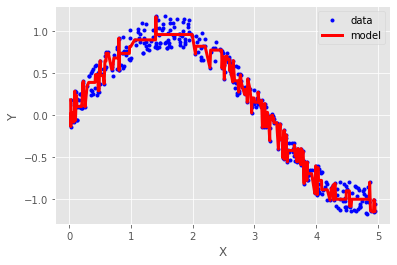

In [78]:
# simulation
from IPython import display
import numpy as np
from matplotlib import pylab as plt
 
# Create a random dataset
rng = np.random.RandomState(42) # fix the seed so the result are stable
N_points = 400
X = np.sort(5 * rng.rand(N_points, 1), axis=0)
y = np.sin(X).ravel() + .4 * (0.5 - rng.rand(N_points))

plt.plot(X, y, 'b.')
plt.xlabel('Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


from ipywidgets import interactive, IntSlider
from sklearn import tree

def train_and_plot(max_depth):
    est = tree.DecisionTreeRegressor(max_depth=max_depth)
    est.fit(X, y)

    plt.plot(X, y, 'b.', label='data')
    line = plt.plot(X, est.predict(X), 'r-', label='model')
    plt.setp(line, linewidth=3.)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend(loc='upper right');
    plt.show()
    
max_depth_slider=IntSlider(min=1,max=8,step=1,value=2)
interactive(train_and_plot, max_depth=8)  # max_depth = 2 -> underfitting; max_depth = 8 -> overfitting

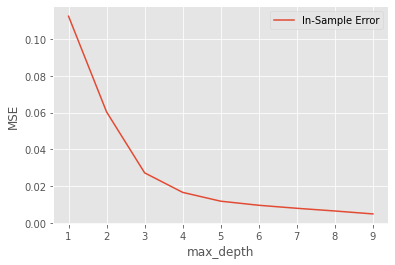

In [79]:
from sklearn import metrics

max_depths = range(1, 10)
in_sample_errors = []
for max_depth in max_depths:
    y_pred = tree.DecisionTreeRegressor(max_depth=max_depth).fit(X, y).predict(X)
    in_sample_errors.append(metrics.mean_squared_error(y, y_pred))
    
plt.plot(max_depths, in_sample_errors, label='In-Sample Error')
plt.xlabel('max_depth')
plt.ylabel('MSE')
plt.legend(loc='upper right');
# MSE will always decrease with increased max_depth

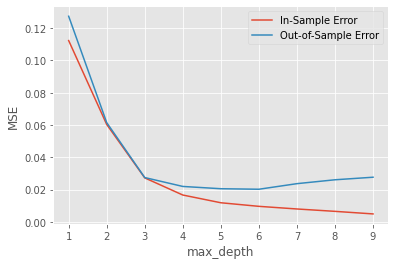

In [80]:
# out of sample training
from sklearn import model_selection
from sklearn import metrics

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=42)


test_errors = []
for max_depth in max_depths:
    est = tree.DecisionTreeRegressor(max_depth=max_depth).fit(X_train, y_train)
    y_pred = est.predict(X_test)
    test_errors.append(metrics.mean_squared_error(y_test, y_pred))

plt.plot(max_depths, in_sample_errors, label='In-Sample Error')
plt.plot(max_depths, test_errors, label='Out-of-Sample Error')
plt.xlabel('max_depth')
plt.ylabel('MSE')
plt.legend(loc='upper right');



This is the picture we were looking for! The In-Sample Error (Training) is always decreasing but the out Out-of-Sample Error (Testing) initially decreases with model complexity (higher max_depth) but ultimately increases again. The Out-of-Sample Error (Testing) is the metric to look at when evaluating overfitting.

It turns out that this is an illustration of a very general problem in machine-learning called Bias-Variance tradeoff (the concept is so general that it even has a Wikipedia article. A more rigorous account can be found here). The tradeoff tells us that we can decompose our Out-of-Sample Error into

### Out-of-Sample Error=Bias+Variance.

<ins>The Bias corresponds to how far off we expect the model to deviate from reality</ins> (i.e. the model's bias) because of parametric assumptions (e.g. we forced the model to be linear or to be a tree of maximum depth 2). It is given by the In-Sample Error of the above plot and always goes down with complexity. <ins>High Bias models correspond to underfitting.</ins>

The Variance accounts for the fact that the model was only trained on a (noisy) subset of the data and that the idiosyncratic noise in the data is therefore likely to contribute some variance to the model. The more complex we allow the model to be, the more likely we are to overfit by picking up more of this noise. <ins>High variance models correspond to overfitting.</ins>

We can also think of bias as unmodeled data and variance as modeled noise. As we increase the complexity of the model, we will necessarily model more of the data (reduce bias, reduce underfitting) but also start modeling noise (increase variance, increase overfitting). Here's a helpful diagram of the decomposition. Notice that at the optimal point, we have not yet learned on all our signal (still unmodeled data left) and we have picked up some noise and overfitting.

## Model Calibration And Evaluation

### Random Forest Classifier

#### Train and Fit Model

In [81]:
# libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, classification_report

In [82]:
# use random forest classifier
clf = RandomForestClassifier(criterion="entropy")

# split the data
X_train, X_test, y_train, y_test = train_test_split(processed_data, target, test_size=0.2)

# train and evaluate classifier
clf.fit(X_train, y_train)
print(f"Mean accuracy of model: {clf.score(X_test, y_test):.3f}")  # score takes in a test data and true label for test data, and return the average accuracy

Mean accuracy of model: 0.950


In [83]:
# print confusion matrix
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred)) 

[[36901   574]
 [ 1433   997]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     37475
           1       0.63      0.41      0.50      2430

    accuracy                           0.95     39905
   macro avg       0.80      0.70      0.74     39905
weighted avg       0.94      0.95      0.94     39905



While precision and recall for 0 (those earning < 50000k/ year) is pretty high, both the metrics are pretty low for 1 (those earning >50000k/ year), with precision=0.64 and recall=0.39. Precision indicates its ability to correctly identify true positives out of all the positive identifications, recall indicates the ability to find the actual positives. Both are not quite satifactory in this case. There is 1 to 16 ratio of imbalanced dataset here. Alternative metrics could be used.

#### Using ROC/ AUC for Random Forest Classifier

<ins>Not to be used for doc</ins>

ROC is an acronym that means Receiver Operating Characteristic and summarizes a field of study for analyzing binary classifiers based on their ability to discriminate classes. A ROC curve is a diagnostic plot for summarizing the behavior of a model by calculating the false positive rate and true positive rate for a set of predictions by the model under different thresholds.

Each threshold is a point on the plot and the points are connected to form a curve. A classifier that has no skill (e.g. predicts the majority class under all thresholds) will be represented by a diagonal line from the bottom left to the top right. Any points below this line have worse than no skill. A perfect model will be a point in the top right of the plot. 

The ROC Curve is a helpful diagnostic for one model. <ins>The area under the ROC curve can be calculated and provides a single score to summarize the plot that can be used to compare models. A no skill classifier will have a score of 0.5, whereas a perfect classifier will have a score of 1.0.</ins>

/home/han/anaconda3/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


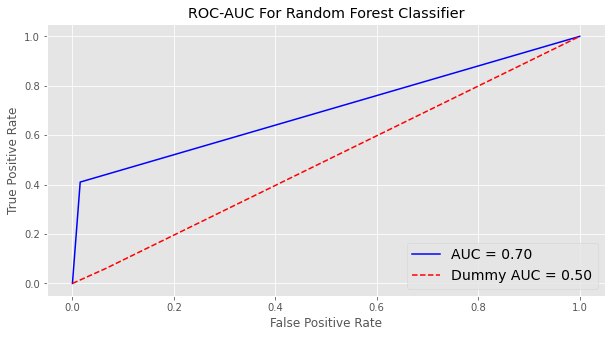

In [84]:
# roc/auc
from sklearn.metrics import auc, roc_curve, roc_auc_score

# using dummy
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier()
dummy.fit(X_train, y_train)
yhat = dummy.predict_proba(X_test)[:,1]
dummy_roc_auc = roc_auc_score(y_test, yhat)  # it is 0.5 as should be
fpr_dummy, tpr_dummy, dummy_threshold = roc_curve(y_test, yhat)

# using data
fpr, tpr, threshold = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)  # gives the same results as roc_auc_score(y_test, y_pred)
plt.figure(figsize=(10,5))
plt.plot(fpr,tpr,'b',label='AUC = %0.2f'% roc_auc)
plt.plot(fpr_dummy, tpr_dummy, "r--", label='Dummy AUC = %0.2f'% dummy_roc_auc)
plt.legend(loc='lower right', prop={'size': 14})
# plt.plot([0,1],[0,1],'k--')  # basically connecting from 0,0 to 1,1
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC-AUC For Random Forest Classifier")
plt.savefig("/home/han/Projects/Data Science Challenge QMUL/Images/rocauc_RFC1.png")

#### Using Precision-Recall Curve

For imbalanced classification with a severe skew and few examples of the minority class, the ROC AUC can be misleading. This is because a small number of correct or incorrect predictions can result in a large change in the ROC Curve or ROC AUC score. 

An alternative to the ROC Curve is the precision-recall curve that can be used in a similar way, although focuses on the performance of the classifier on the minority class. Again, different thresholds are used on a set of predictions by a model, and in this case, the precision and recall are calculated. The points form a curve and classifiers that perform better under a range of different thresholds will be ranked higher.

<ins>A no-skill classifier will be a horizontal line on the plot with a precision that is proportional to the number of positive examples in the dataset. For a balanced dataset this will be 0.5. A perfect classifier is represented by a point in the top right.</ins>

And like the ROC AUC, we can calculate the area under the curve as a score and use that score to compare classifiers. In this case, the focus on the minority class makes the Precision-Recall AUC more useful for imbalanced classification problems.

A model with perfect skill is depicted as a point at a coordinate of (1,1). A skillful model is represented by a curve that bows towards a coordinate of (1,1). A no-skill classifier will be a horizontal line on the plot with a precision that is proportional to the number of positive examples in the dataset. For a balanced dataset this will be 0.5.

/home/han/anaconda3/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


Dummy auc is 0.09009739375093036.


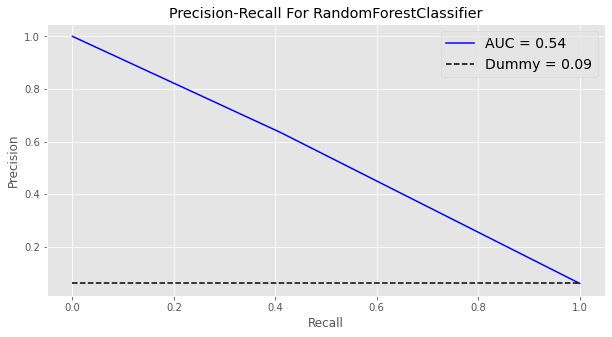

In [85]:
# using the precision-recall curve

# using a dummy for no-skill
from sklearn.dummy import DummyClassifier
from sklearn.metrics import precision_recall_curve, precision_recall_fscore_support
dummy = DummyClassifier()
dummy.fit(X_train, y_train)
yhat = dummy.predict_proba(X_test)[:,1]
precision, recall, threshold = precision_recall_curve(y_test, yhat)
pr_auc_dummy = auc(recall, precision)
print(f"Dummy auc is {pr_auc_dummy}.")

# for the actual data
precision, recall, threshold = precision_recall_curve(y_test, y_pred)
pr_auc = auc(recall, precision)

# plot
# calculate the dummy line as the proportion of the positive class
dummy = len(y_test[y_test==1]) / len(y_test)
plt.figure(figsize=(10,5))
plt.plot(recall,precision,'b',label='AUC = %0.2f'% pr_auc)
plt.plot([0,1],[dummy,dummy],'k--', label= "Dummy = %0.2f"% pr_auc_dummy)  
plt.legend(loc='upper right', prop={'size': 14})
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title("Precision-Recall For RandomForestClassifier")
plt.savefig("/home/han/Projects/Data Science Challenge QMUL/Images/precision_recall_RFC1.png")

#### Use GridSearch

In [102]:
# use grid search  # takes a long time
rfc=RandomForestClassifier(random_state=42)  # reinitialise a randomforestclassifier
param_grid = { 
    'n_estimators': [200,500,700],
    #'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [2,4,6,8],
    #'criterion' :['gini', 'entropy']
}
grid_search = GridSearchCV(rfc, param_grid=param_grid, cv=5, scoring = "f1")
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [103]:
grid_search.best_params_

{'max_depth': 8, 'n_estimators': 700}

#### Use parameter from grid search

In [88]:
rfc1 = RandomForestClassifier(random_state=42, max_depth=8, n_estimators=200)
rfc1.fit(X_train, y_train)
print(f"Mean accuracy of model: {rfc1.score(X_test, y_test):.3f}")

Mean accuracy of model: 0.946


In [89]:
# confusion matrix
y_pred_rfc2 = rfc1.predict(X_test)
print(classification_report(y_test, y_pred_rfc2))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97     37475
           1       0.90      0.13      0.23      2430

    accuracy                           0.95     39905
   macro avg       0.93      0.57      0.60     39905
weighted avg       0.94      0.95      0.93     39905



/home/han/anaconda3/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


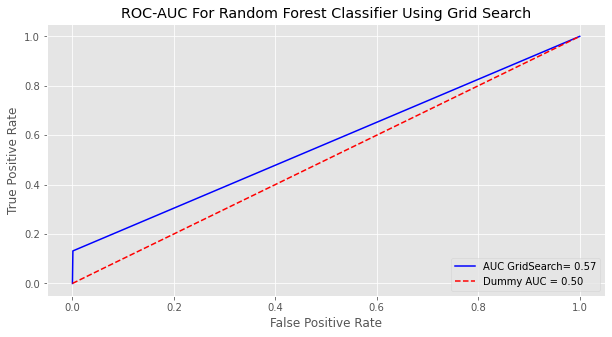

In [90]:
# roc-auc
from sklearn.metrics import auc, roc_curve, roc_auc_score

# using dummy
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier()
dummy.fit(X_train, y_train)
yhat = dummy.predict_proba(X_test)[:,1]
dummy_roc_auc = roc_auc_score(y_test, yhat)  # it is 0.5 as should be
fpr_dummy, tpr_dummy, dummy_threshold = roc_curve(y_test, yhat)

# using data
fpr_rfc2, tpr_rfc2, threshold = roc_curve(y_test, y_pred_rfc2)
roc_auc_rfc2 = auc(fpr_rfc2, tpr_rfc2)  # gives the same results as roc_auc_score(y_test, y_pred)
plt.figure(figsize=(10,5))
plt.plot(fpr_rfc2,tpr_rfc2,'b',label='AUC GridSearch= %0.2f'% roc_auc_rfc2)
plt.plot(fpr_dummy, tpr_dummy, "r--", label='Dummy AUC = %0.2f'% dummy_roc_auc)
plt.legend(loc='lower right')
# plt.plot([0,1],[0,1],'k--')  # basically connecting from 0,0 to 1,1
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC-AUC For Random Forest Classifier Using Grid Search")
plt.savefig("/home/han/Projects/Data Science Challenge QMUL/Images/rocauc_GridSearch_RFC2.png")

/home/han/anaconda3/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


Dummy auc is 0.09901823029503293.


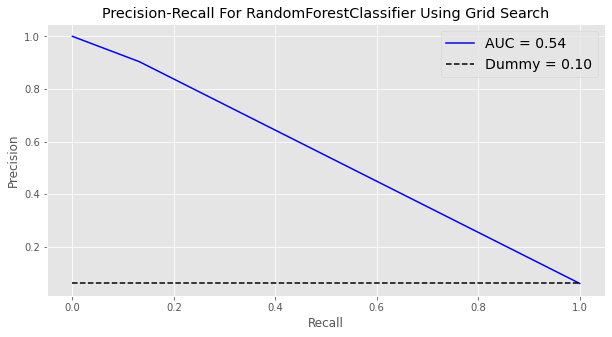

In [91]:
# using the precision-recall curve

# using a dummy for no-skill
from sklearn.dummy import DummyClassifier
from sklearn.metrics import precision_recall_curve, precision_recall_fscore_support
dummy = DummyClassifier()
dummy.fit(X_train, y_train)
yhat = dummy.predict_proba(X_test)[:,1]
precision, recall, threshold = precision_recall_curve(y_test, yhat)
pr_auc_dummy = auc(recall, precision)
print(f"Dummy auc is {pr_auc_dummy}.")

# for the actual data
precision_rfc2, recall_rfc2, threshold = precision_recall_curve(y_test, y_pred_rfc2)
pr_auc_rfc2 = auc(recall_rfc2, precision_rfc2)

# plot
# calculate the dummy line as the proportion of the positive class
dummy = len(y_test[y_test==1]) / len(y_test)
plt.figure(figsize=(10,5))
plt.plot(recall_rfc2,precision_rfc2,'b',label='AUC = %0.2f'% pr_auc_rfc2)
plt.plot([0,1],[dummy,dummy],'k--', label= "Dummy = %0.2f"% pr_auc_dummy)  
plt.legend(loc='upper right', prop={'size': 14})
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title("Precision-Recall For RandomForestClassifier Using Grid Search")
plt.savefig("/home/han/Projects/Data Science Challenge QMUL/Images/precision_recall_RFC2.png")

### Logistic Regression

#### Train and Fit Model

In [93]:
# library 
from sklearn.linear_model import LogisticRegression

# train model
lr = LogisticRegression(solver='lbfgs', max_iter=1000)
lr.fit(X_train, y_train)

# evaluate
print(f"Mean accuracy of model: {lr.score(X_test, y_test):.3f}")

Mean accuracy of model: 0.950


In [95]:
# print confusion matrix
y_pred_lr = lr.predict(X_test)
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr)) 

[[37152   323]
 [ 1670   760]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     37475
           1       0.70      0.31      0.43      2430

    accuracy                           0.95     39905
   macro avg       0.83      0.65      0.70     39905
weighted avg       0.94      0.95      0.94     39905



#### Use ROC/AUC for LogisticRegression

/home/han/anaconda3/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


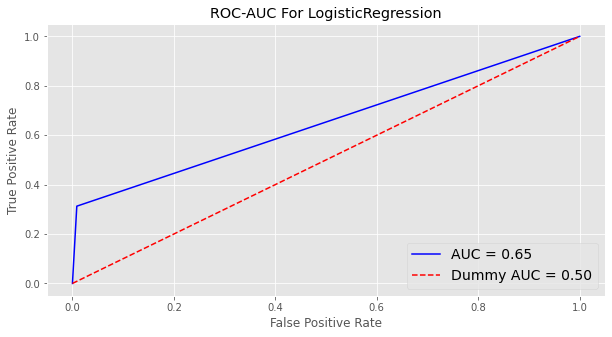

In [96]:
# roc/auc

# using dummy
dummy = DummyClassifier()
dummy.fit(X_train, y_train)
yhat = dummy.predict_proba(X_test)[:,1]
dummy_roc_auc = roc_auc_score(y_test, yhat)  # 0.5
fpr_dummy, tpr_dummy, dummy_threshold = roc_curve(y_test, yhat)

# using data
fpr_lr, tpr_lr, threshold = roc_curve(y_test, y_pred_lr)
roc_auc = auc(fpr_lr, tpr_lr)  # gives the same results as roc_auc_score(y_test, y_pred)
plt.figure(figsize=(10,5))
plt.plot(fpr_lr,tpr_lr,'b',label='AUC = %0.2f'% roc_auc)
plt.plot(fpr_dummy, tpr_dummy, "r--", label='Dummy AUC = %0.2f'% dummy_roc_auc)
plt.legend(loc='lower right', prop={'size': 14})
# plt.plot([0,1],[0,1],'k--')  # basically connecting from 0,0 to 1,1
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC-AUC For LogisticRegression")
plt.savefig("/home/han/Projects/Data Science Challenge QMUL/Images/rocauc_LR1.png")

#### Using Precision-recall for LogisticRegression

Dummy auc is 0.1004194862268255.


/home/han/anaconda3/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


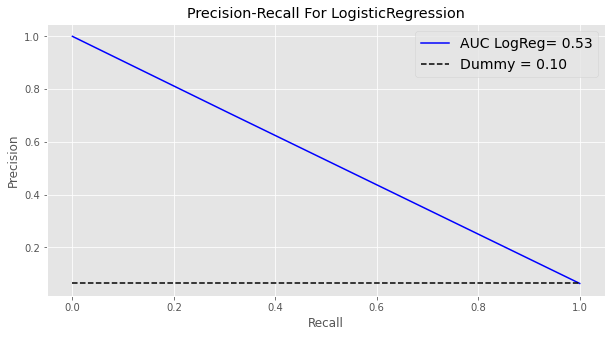

In [80]:
# using the precision-recall curve

# using a dummy for no-skill
from sklearn.dummy import DummyClassifier
from sklearn.metrics import precision_recall_curve, precision_recall_fscore_support
dummy = DummyClassifier()
dummy.fit(X_train, y_train)
yhat = dummy.predict_proba(X_test)[:,1]
precision, recall, threshold = precision_recall_curve(y_test, yhat)
pr_auc_dummy = auc(recall, precision)
print(f"Dummy auc is {pr_auc_dummy}.")

# for the actual data
precision_lr, recall_lr, threshold = precision_recall_curve(y_test, y_pred_lr)
pr_auc_lr = auc(recall_lr, precision_lr)

# plot
# calculate the dummy line as the proportion of the positive class
dummy = len(y_test[y_test==1]) / len(y_test)
plt.figure(figsize=(10,5))
plt.plot(recall_lr,precision_lr,'b',label='AUC LogReg= %0.2f'% pr_auc_lr)
plt.plot([0,1],[dummy,dummy],'k--', label= "Dummy = %0.2f"% pr_auc_dummy)  
plt.legend(loc='upper right', prop={'size': 14})
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title("Precision-Recall For LogisticRegression")
plt.savefig("/home/han/Projects/Data Science Challenge QMUL/Images/precision_recall_LR1.png")

#### Use Grid Search for Logistic Regression

So, in general, our model has better precision for the correct class but worse recall. Precision and recall is always at a tug-of-war. Precision relies on false positive while recall relies on false negatives. Changing the threshold to reduce false positives can often end up increasing false negatives. Hence, their relationship. Still, we'll focus on recall here in the grid search to improve the ability to detect actual positives.

In [97]:
lr2 = LogisticRegression(random_state=42, solver="liblinear")  # have to use liblinear as l1 is not supported by lbfgs
grid_values = {'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25]}
grid_lr = GridSearchCV(lr2, param_grid = grid_values,scoring = 'f1')
grid_lr.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=42, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.009, 0.01, 0.09, 1, 5, 10, 25],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=0)

In [98]:
grid_lr.best_params_

{'C': 10, 'penalty': 'l1'}

In [99]:
y_pred_gridlr = grid_lr.predict(X_test)
print(classification_report(y_test, y_pred_gridlr))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97     37475
           1       0.70      0.32      0.44      2430

    accuracy                           0.95     39905
   macro avg       0.83      0.66      0.71     39905
weighted avg       0.94      0.95      0.94     39905



/home/han/anaconda3/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


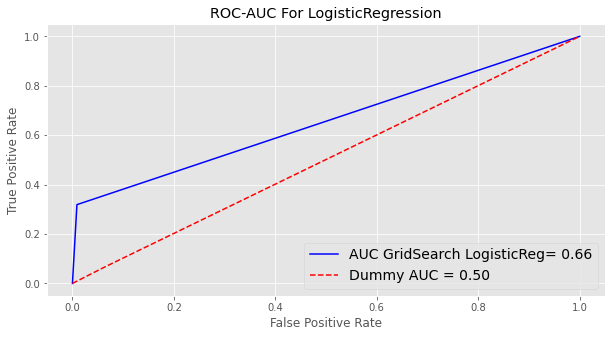

In [100]:
# roc/auc

# using dummy
dummy = DummyClassifier()
dummy.fit(X_train, y_train)
yhat = dummy.predict_proba(X_test)[:,1]
dummy_roc_auc = roc_auc_score(y_test, yhat)  # 0.5
fpr_dummy, tpr_dummy, dummy_threshold = roc_curve(y_test, yhat)

# using data
fpr_lr2, tpr_lr2, threshold = roc_curve(y_test, y_pred_gridlr)
roc_auc_lr2 = auc(fpr_lr2, tpr_lr2)  # gives the same results as roc_auc_score(y_test, y_pred)
plt.figure(figsize=(10,5))
plt.plot(fpr_lr2,tpr_lr2,'b',label='AUC GridSearch LogisticReg= %0.2f'% roc_auc_lr2)
plt.plot(fpr_dummy, tpr_dummy, "r--", label='Dummy AUC = %0.2f'% dummy_roc_auc)
plt.legend(loc='lower right', prop={'size': 14})
# plt.plot([0,1],[0,1],'k--')  # basically connecting from 0,0 to 1,1
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC-AUC For LogisticRegression")
plt.savefig("/home/han/Projects/Data Science Challenge QMUL/Images/rocauc_GridSearch_LR2.png")

/home/han/anaconda3/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


Dummy auc is 0.10146229780012792.


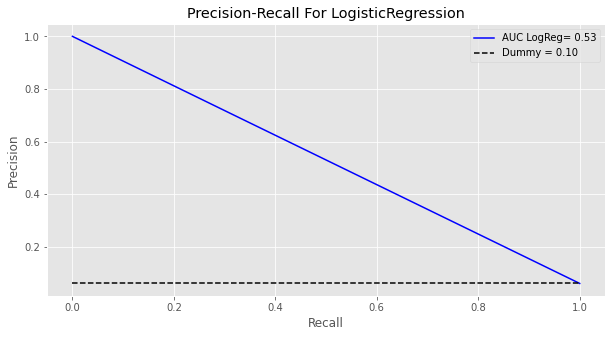

In [101]:
# using the precision-recall curve

# using a dummy for no-skill
from sklearn.dummy import DummyClassifier
from sklearn.metrics import precision_recall_curve, precision_recall_fscore_support
dummy = DummyClassifier()
dummy.fit(X_train, y_train)
yhat = dummy.predict_proba(X_test)[:,1]
precision, recall, threshold = precision_recall_curve(y_test, yhat)
pr_auc_dummy = auc(recall, precision)
print(f"Dummy auc is {pr_auc_dummy}.")

# for the actual data
precision_lr2, recall_lr2, threshold = precision_recall_curve(y_test, y_pred_gridlr)
pr_auc_lr2 = auc(recall_lr2, precision_lr2)

# plot
# calculate the dummy line as the proportion of the positive class
dummy = len(y_test[y_test==1]) / len(y_test)
plt.figure(figsize=(10,5))
plt.plot(recall_lr2, precision_lr2,'b',label='AUC LogReg= %0.2f'% pr_auc_lr2)
plt.plot([0,1],[dummy,dummy],'k--', label= "Dummy = %0.2f"% pr_auc_dummy)  
plt.legend(loc='upper right')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title("Precision-Recall For LogisticRegression")
plt.savefig("/home/han/Projects/Data Science Challenge QMUL/Images/precison_recall_GridSearch_LR2.png")

### Feature selection using RandomForestClassifier

#### Feature selection

In [65]:
# to see how the data looks after the ColumnTransformer
pd.DataFrame.sparse.from_spmatrix(processed_data)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90
0,0.811111,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.644444,0.0,0.000000,0.00000,0.166667,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.200000,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.100000,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.111111,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199518,0.966667,0.0,0.000000,0.00000,0.000000,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
199519,0.722222,0.0,0.064181,0.00009,0.166667,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
199520,0.522222,0.0,0.000000,0.00157,1.000000,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
199521,0.177778,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [66]:
processed_data[0:processed_data.shape[0],[2,3]]

<199523x2 sparse matrix of type '<class 'numpy.float64'>'
	with 28520 stored elements in Compressed Sparse Row format>

In [67]:
# a function to get the column names after ColumnTransformer
def get_column_names_from_ColumnTransformer(column_transformer):    
    col_name = []
    for transformer_in_columns in column_transformer.transformers_[:-1]:#the last transformer is ColumnTransformer's 'remainder'
        raw_col_name = transformer_in_columns[2]
        if isinstance(transformer_in_columns[1],Pipeline): 
            transformer = transformer_in_columns[1].steps[-1][1]
        else:
            transformer = transformer_in_columns[1]
        try:
            names = transformer.get_feature_names()
        except AttributeError: # if no 'get_feature_names' function, use raw column name
            names = raw_col_name
        if isinstance(names,np.ndarray): # eg.
            col_name += names.tolist()
        elif isinstance(names,list):
            col_name += names    
        elif isinstance(names,str):
            col_name.append(names)
    return col_name
col_features = np.array(get_column_names_from_ColumnTransformer(preprocessor))

In [68]:
from sklearn.feature_selection import SelectFromModel

# rf_selector = SelectFromModel(LogisticRegression(max_iter=1000, C=10), max_features=22)
rf_selector = SelectFromModel(RandomForestClassifier(random_state=42, max_depth=8, n_estimators=200), max_features=22)
rf_selector.fit(processed_data, target)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                                 class_weight=None,
                                                 criterion='gini', max_depth=8,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 max_samples=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=200, n_jobs=None,
                                                 oob_score=False,
                                                 ra

In [69]:
# get the index and name
rf_support = rf_selector.get_support()
rf_ind = [i for i,num in enumerate(rf_support) if num==True]
col_features[rf_ind]  # this shows what features were considered important

array(['age', 'capital_gains', 'divdends_from_stocks',
       'family_members_under', 'capital_losses', 'weeks_worked',
       'is_male', 'x1_Married-civilian spouse present',
       'x1_Never married', 'x2_Adm support including clerical',
       'x2_Executive admin and managerial', 'x2_Professional specialty',
       'x2_null', 'x4_null', 'x5_Self-employed-incorporated', 'x5_null'],
      dtype='<U46')

#### Train and evaluate

In [70]:
# train RandomForestClassifier again using the features pulled
new_data = processed_data[0:processed_data.shape[0], rf_ind]

# split and train
X_train2, X_test2, y_train2, y_test2 = train_test_split(new_data, target, test_size=0.2)

# train and evaluate classifier
clf = RandomForestClassifier(random_state=42, max_depth=8, n_estimators=200)
# clf = LogisticRegression(max_iter=1000, C=10)
clf.fit(X_train2, y_train2)
print(f"Mean accuracy of model: {clf.score(X_test2, y_test2):.3f}")  # score takes in a test data and true label for test data, and return the average accuracy

Mean accuracy of model: 0.951


In [71]:
# print confusion matrix
y_pred2 = clf.predict(X_test2)
print(confusion_matrix(y_test2, y_pred2))
print(classification_report(y_test2, y_pred2)) 

[[37274   140]
 [ 1835   656]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     37414
           1       0.82      0.26      0.40      2491

    accuracy                           0.95     39905
   macro avg       0.89      0.63      0.69     39905
weighted avg       0.95      0.95      0.94     39905



#### Roc/AUC

/home/han/anaconda3/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


Text(0.5, 1.0, 'ROC-AUC For Random Forest Classifier')

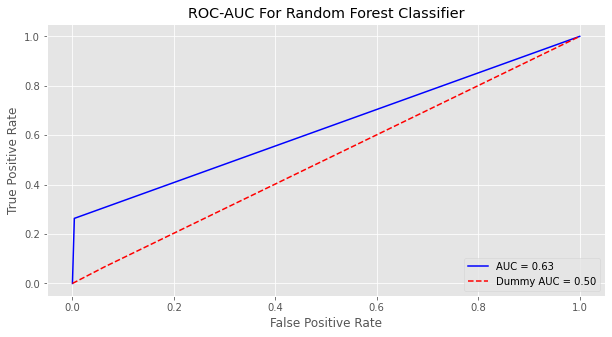

In [72]:
# roc/auc
from sklearn.metrics import auc, roc_curve, roc_auc_score

# using dummy
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier()
dummy.fit(X_train2, y_train2)
yhat = dummy.predict_proba(X_test2)[:,1]
dummy_roc_auc = roc_auc_score(y_test2, yhat)  # it is 0.5 as should be
fpr_dummy, tpr_dummy, dummy_threshold = roc_curve(y_test2, yhat)

# using data
fpr, tpr, threshold = roc_curve(y_test2, y_pred2)
roc_auc = auc(fpr, tpr)  # gives the same results as roc_auc_score(y_test, y_pred)
plt.figure(figsize=(10,5))
plt.plot(fpr,tpr,'b',label='AUC = %0.2f'% roc_auc)
plt.plot(fpr_dummy, tpr_dummy, "r--", label='Dummy AUC = %0.2f'% dummy_roc_auc)
plt.legend(loc='lower right')
# plt.plot([0,1],[0,1],'k--')  # basically connecting from 0,0 to 1,1
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC-AUC For Random Forest Classifier")

#### Precision-recall

Dummy auc is 0.08917070864011335.


/home/han/anaconda3/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


Text(0.5, 1.0, 'Precision-Recall For RandomForestClassifier')

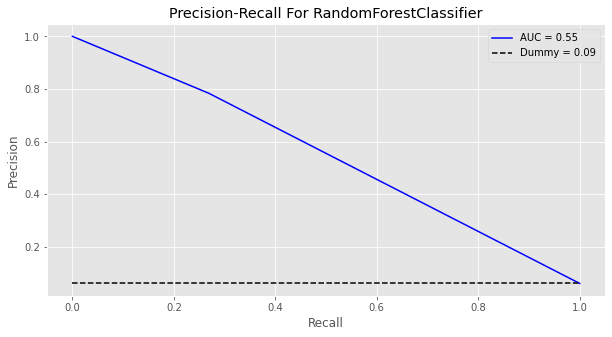

In [220]:
# using the precision-recall curve

# using a dummy for no-skill
from sklearn.dummy import DummyClassifier
from sklearn.metrics import precision_recall_curve, precision_recall_fscore_support
dummy = DummyClassifier()
dummy.fit(X_train2, y_train2)
yhat = dummy.predict_proba(X_test2)[:,1]
precision, recall, threshold = precision_recall_curve(y_test2, yhat)
pr_auc_dummy = auc(recall, precision)
print(f"Dummy auc is {pr_auc_dummy}.")

# for the actual data
precision, recall, threshold = precision_recall_curve(y_test2, y_pred2)
pr_auc = auc(recall, precision)

# plot
# calculate the dummy line as the proportion of the positive class
dummy = len(y_test2[y_test2==1]) / len(y_test2)
plt.figure(figsize=(10,5))
plt.plot(recall,precision,'b',label='AUC = %0.2f'% pr_auc)
plt.plot([0,1],[dummy,dummy],'k--', label= "Dummy = %0.2f"% pr_auc_dummy)  
plt.legend(loc='upper right')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title("Precision-Recall For RandomForestClassifier")

In [122]:
backup["grid_lr"] = pd.Series(grid_lr)

/home/han/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->values] [items->None]

  exec(code_obj, self.user_global_ns, self.user_ns)


## Save outputs

In [122]:
!jupyter nbconvert --to html Challenge.ipynb

[NbConvertApp] Converting notebook Challenge.ipynb to html
[NbConvertApp] Writing 332080 bytes to Challenge.html
